time 0.0020711421966552734
[  4   6   8   8   7  18  21  13   3   6   8  13   2   3   4   3   6  11
  12   7  19  55  50  22  11  27  22  17   3   7   8   8  21  13  13  13
  81  93  92  99 117 117 117  74  32  73  95  76  19   9   8   4  59  49
  55  27  55  87  75  42  16  40  64  48   7   7   7   2  19  19  26  12
   4   6  11  17   5   7   5   4   9  13  12   6  20  24  16  16  14  16
  14  18   6  15   2   3  27  47  65  57  91  65  38  39 102 117 117 117
  14  48  29  26  11  20  26  34  36  39  33  18  40  64  79  59   5  21
  21  14]


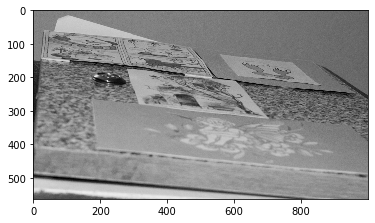

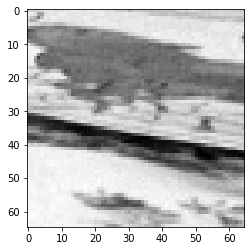

In [1]:
%matplotlib inline
from numpy_sift import SIFTDescriptor 
import matplotlib.pyplot as plt
patch_size = 65
SD = SIFTDescriptor(patchSize = patch_size)

import sys
sys.path.insert(0, '/home/ubuntu/dev/opencv-3.1/build/lib')
import cv2
import time

image = cv2.imread('img/fox.png',0)
plt.figure()
plt.imshow(image, cmap="gray")

h,w = image.shape
patch = image[int(h/4): int(h/4 + patch_size),int(w/3) : int(w/3 + patch_size)]
plt.figure()
plt.imshow(patch, cmap="gray")

t = time.time()
sift = SD.describe(patch)
print ('time', time.time() - t)
print (sift)

Now lets calculate inverted SIFT
Image from https://eprints.soton.ac.uk/272237/1/Paper_17.pdf
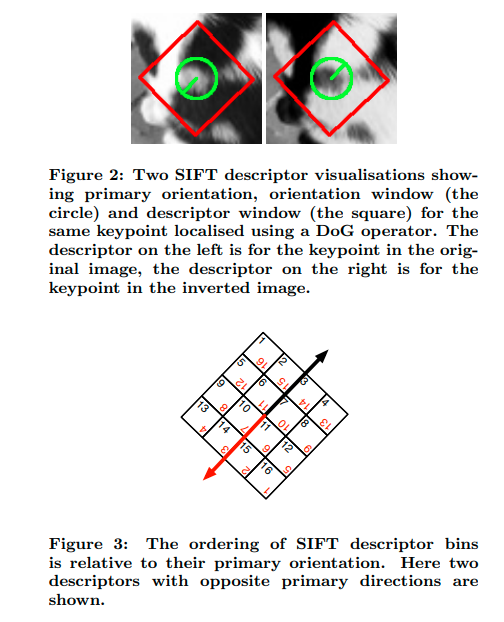

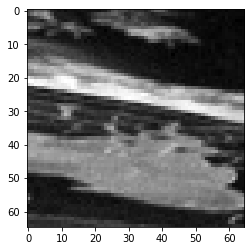

In [2]:
#Patch is rotated 180 deg, because orientation detection on the inverted patch would be +180 deg.
inv_rot_patch = 255-patch[::-1,::-1]
plt.imshow(inv_rot_patch, cmap="gray")

In [3]:
sift_patch_inverted_and_rot = SD.describe(inv_rot_patch)
print (sift_patch_inverted_and_rot)

[  3   4   3   2  13   8   6   3  13  21  18   7   8   8   6   4   8   9
   7   3  17  22  27  11  22  50  55  19   7  12  11   6  76  95  73  32
  73 117 117 117  99  92  93  81  13  13  12  20  48  64  40  16  42  75
  87  55  27  55  49  59   4   8   9  19   4   5   7   5  17  11   6   4
  12  26  19  19   2   7   7   7   3   2  15   6  18  14  16  14  16  16
  24  20   6  12  13   9  26  29  49  14 117 117 117 102  39  38  65  91
  57  65  47  27  14  21  21   5  59  79  64  40  18  33  39  36  34  26
  20  11]


In [4]:
from copy import deepcopy
import numpy as np
#Finally, let's calculate inverted SIFT
def invert_sift_desc(sift_desc):
    return sift_desc.reshape(8,4,4)[:,::-1,::-1].flatten()
print (sift_patch_inverted_and_rot - invert_sift_desc(sift))

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]
